# Canny Edges
Making a image that is half edges and half original

## Imports

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Functions

In [2]:
def CannyThreshold(threshold, ratio, img_gray):
    low_threshold = threshold
    img_blur = cv2.blur(img_gray, (3,3))
    edges = cv2.Canny(img_blur, low_threshold, low_threshold*ratio, kernel_size)
    edges = (-1*edges)+255 # inverts black and white
    return edges

## Parameters and Constants

In [3]:
thresh = 50
ratio = 3 # Canny recommended a upper:lower ratio between 2:1 and 3:1.
kernel_size = 3

In [4]:
path = ""
img_file = 'andrew-schultz-DTSDD968Mpw-unsplash.jpg'

## Method

### Loads the original

In [5]:
image = cv2.imread(path + img_file)

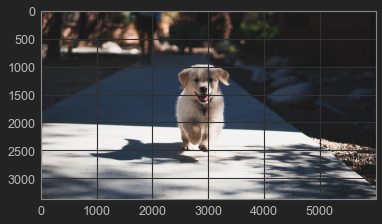

In [6]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

### Turns the colored image into grayscale

In [7]:
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

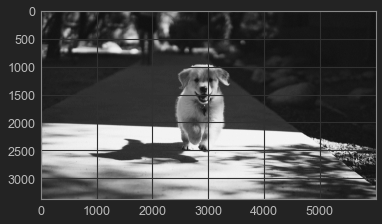

In [8]:
plt.imshow(img_gray, cmap = 'gray')

### Apply the CannyThreshold to find the edges

In [9]:
edges = CannyThreshold(threshold = 1, ratio = 2, img_gray = img_gray)

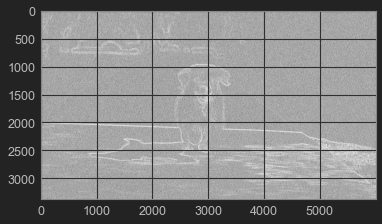

In [10]:
plt.imshow(edges, cmap = 'gray')

### There is much noise, so we may apply some blur

In [11]:
edges_blur = cv2.blur(edges, (5, 5))

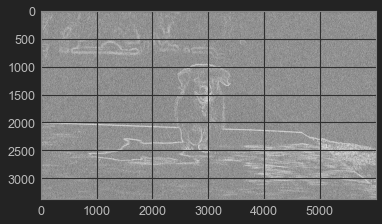

In [12]:
plt.imshow(edges_blur, cmap = 'gray')

### Binarize the image

In [13]:
edges_bin = cv2.threshold(edges_blur.astype('uint8'), 210, 255, cv2.THRESH_BINARY)[1]

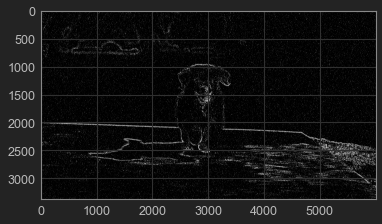

In [14]:
plt.imshow(edges_bin, cmap = 'gray')

### Concatenate both images

In [15]:
offset = 105

In [16]:
half_img = cv2.hconcat([cv2.cvtColor(edges_bin, cv2.COLOR_GRAY2BGR)[:, 0: int(edges_bin.shape[1]/2)- offset] , image[:, int(image.shape[1]/2) - offset : -1] ])

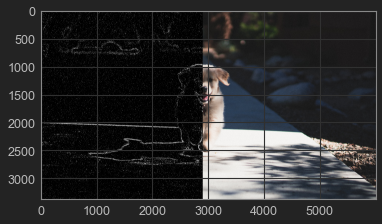

In [17]:
plt.imshow(cv2.cvtColor(half_img, cv2.COLOR_BGR2RGB))

In [18]:
cv2.imwrite(path + "dog_edges.jpg", half_img)

True